In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Done')

Done


In [303]:
#Load data set
train=pd.read_csv('D:\\resources\\Digital Academy\\Python\\Advanced\\Machine Learning\\train.csv',encoding='iso-8859-1',index_col=0)
test=pd.read_csv('D:\\resources\\Digital Academy\\Python\\Advanced\\Machine Learning\\test.csv',encoding='iso-8859-1',index_col=0)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [253]:
train.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,MI,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,MI,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [254]:
test.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
ticket_id,,,,,,,,,,,,,,,,,,,,,
284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,MI,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,MI,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,MI,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [255]:
train.shape

(250306, 33)

In [256]:
train['payment_date'].head()

ticket_id
22056                    NaN
27586    2005-06-02 00:00:00
22062                    NaN
22084                    NaN
22093                    NaN
Name: payment_date, dtype: object

In [7]:
train['hearing_date'].head()

ticket_id
22056    2005-03-21 10:30:00
27586    2005-05-06 13:30:00
22062    2005-03-29 10:30:00
22084                    NaN
22093    2005-03-29 10:30:00
Name: hearing_date, dtype: object

In [8]:
train[['violation_code', 'violation_description']].head()

,violation_code,violation_description
ticket_id,,
22056,9-1-36(a),Failure of owner to obtain certificate of comp...
27586,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...
22062,9-1-36(a),Failure of owner to obtain certificate of comp...
22084,9-1-36(a),Failure of owner to obtain certificate of comp...
22093,9-1-36(a),Failure of owner to obtain certificate of comp...


In [9]:
test.shape

(61001, 26)

In [10]:
train.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [11]:
train.isna().sum()

agency_name                        0
inspector_name                     0
violator_name                     34
violation_street_number            0
violation_street_name              0
violation_zip_code            250306
mailing_address_str_number      3602
mailing_address_str_name           4
city                               0
state                             93
zip_code                           1
non_us_str_code               250303
country                            0
ticket_issued_date                 0
hearing_date                   12491
violation_code                     0
violation_description              0
disposition                        0
fine_amount                        1
admin_fee                          0
state_fee                          0
late_fee                           0
discount_amount                    0
clean_up_cost                      0
judgment_amount                    0
payment_amount                     0
balance_due                        0
p

In [12]:
train.dtypes

agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code            float64
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code                object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
payment_amount                float64
balance_due 

In [13]:
test.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status'],
      dtype='object')

In [14]:
test.isna().sum()

agency_name                       0
inspector_name                    0
violator_name                    28
violation_street_number           0
violation_street_name             0
violation_zip_code            36977
mailing_address_str_number     1014
mailing_address_str_name          3
city                              1
state                           331
zip_code                          3
non_us_str_code               61001
country                           0
ticket_issued_date                0
hearing_date                   2197
violation_code                    0
violation_description             0
disposition                       0
fine_amount                       0
admin_fee                         0
state_fee                         0
late_fee                          0
discount_amount                   0
clean_up_cost                     0
judgment_amount                   0
grafitti_status               58780
dtype: int64

In [15]:
test.dtypes

agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code             object
mailing_address_str_number     object
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code               float64
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
grafitti_status                object
dtype: objec

In [16]:
#Counts of cities
train['city'].value_counts()

DETROIT                136936
SOUTHFIELD              13436
Detroit                 10496
detroit                  4183
DEARBORN                 3637
FARMINGTON HILLS         2329
OAK PARK                 2216
WARREN                   2000
DET                      1657
W. BLOOMFIELD            1635
LIVONIA                  1614
REDFORD                  1544
TROY                     1525
WEST BLOOMFIELD          1106
Southfield               1046
CANTON                   1018
DET.                      944
EASTPOINTE                887
FARMINGTON                873
BLOOMFIELD HILLS          860
CHICAGO                   843
LATHRUP VILLAGE           753
ROSEVILLE                 738
LANSING                   728
GROSSE POINTE             720
SAN DIEGO                 708
ST. CLAIR SHORES          707
WESTLAND                  693
FERNDALE                  690
STERLING HEIGHTS          652
                        ...  
atlanta                     1
detroiot                    1
MADISSON H

In [17]:
#Count of cities on test data
test['city'].value_counts()

DETROIT              26358
Detroit               4168
SOUTHFIELD            2466
DEARBORN              1808
FARMINGTON HILLS       773
WEST BLOOMFIELD        700
Southfield             447
detroit                438
BLOOMFIELD HILLS       436
TROY                   434
WARREN                 427
PONTIAC                408
DEARBORN HEIGHTS       388
LIVONIA                365
REDFORD                365
OAK PARK               355
Dearborn               306
HAMTRAMCK              277
ROYAL OAK              249
DALLAS                 229
LAS VEGAS              222
CANTON                 222
BERKLEY                220
GROSSE POINTE          211
Farmington Hills       211
STERLING HEIGHTS       201
CHICO                  179
det                    174
LATHRUP VILLAGE        168
FERNDALE               168
                     ...  
NORCROSS                 1
SCHAUMBERG               1
BROMLEY                  1
SUNNY ISLES VEACH        1
RAMONT JERUSALEM         1
INDIANAPOLS              1
M

## Data Wrangling

In [304]:
#Dropping some columns with high number of missing values
train=train.drop(['violation_zip_code','non_us_str_code','payment_date','grafitti_status','collection_status'],axis=1)

In [305]:
test=test.drop(['violation_zip_code','non_us_str_code','grafitti_status'],axis=1)

In [306]:
columns=['hearing_date','state','fine_amount']
for col in columns:
    train[col]=train[col].fillna(train[col].mode()[0])

In [307]:
columns=['hearing_date','state']
for col in columns:
    test[col]=test[col].fillna(test[col].mode()[0])

In [308]:
test[['hearing_date','state']].isna().sum()

hearing_date    0
state           0
dtype: int64

In [309]:
test[['hearing_date','state']].dtypes

hearing_date    object
state           object
dtype: object

In [310]:
train[['hearing_date','state','fine_amount','compliance']].isna().sum()

hearing_date        0
state               0
fine_amount         0
compliance      90426
dtype: int64

In [311]:
train[['hearing_date','state','fine_amount','compliance']].dtypes

hearing_date     object
state            object
fine_amount     float64
compliance      float64
dtype: object

In [312]:
train.dtypes

agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
payment_amount                float64
balance_due                   float64
payment_status                 object
compliance_d

In [313]:
#Creating Duration columns
train['Duration']=(pd.to_datetime(train['hearing_date'])-pd.to_datetime(train['ticket_issued_date'])).dt.days
test['Duration']=(pd.to_datetime(test['hearing_date'])-pd.to_datetime(test['ticket_issued_date'])).dt.days

In [314]:
train[['hearing_date','ticket_issued_date']].sample(5)

,hearing_date,ticket_issued_date
ticket_id,,
26439,2005-04-19 13:30:00,2005-03-22 10:35:00
252272,2010-09-01 10:30:00,2010-06-15 10:35:00
53792,2005-12-22 10:30:00,2005-10-20 14:15:00
76518,2006-07-05 09:00:00,2006-05-22 10:05:00
23527,2005-04-05 13:30:00,2005-02-28 13:00:00


In [315]:
train.isna().sum()

agency_name                       0
inspector_name                    0
violator_name                    34
violation_street_number           0
violation_street_name             0
mailing_address_str_number     3602
mailing_address_str_name          4
city                              0
state                             0
zip_code                          1
country                           0
ticket_issued_date                0
hearing_date                      0
violation_code                    0
violation_description             0
disposition                       0
fine_amount                       0
admin_fee                         0
state_fee                         0
late_fee                          0
discount_amount                   0
clean_up_cost                     0
judgment_amount                   0
payment_amount                    0
balance_due                       0
payment_status                    0
compliance_detail                 0
compliance                  

In [316]:
train['compliance']=train['compliance'].fillna('Not responsible')

## Visualization

Text(0.5, 1.0, 'Compliance distribution including not responsible column')

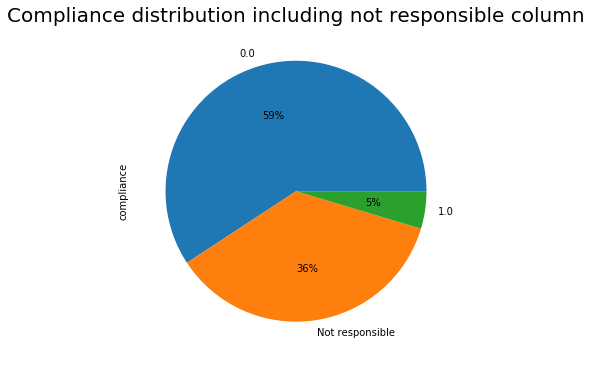

In [317]:
#Checking the distribution of compliance including the not responsible
train['compliance'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6))
plt.title('Compliance distribution including not responsible column',fontsize=20)

In [318]:
train=train[train['compliance']!='Not responsible']
train['compliance']=train['compliance'].astype(int)

Text(0.5, 1.0, 'Compliance distribution')

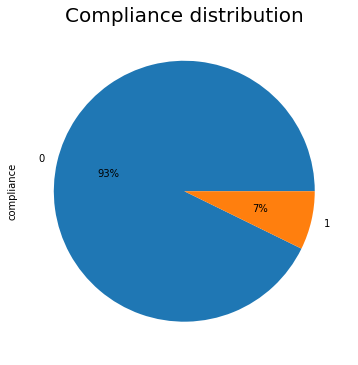

In [319]:
#Checking the distribution of compliance after dropping the not responsible
train['compliance'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6))
plt.title('Compliance distribution',fontsize=20)

### Majority are non-compliant

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Compliance vs fine amount')

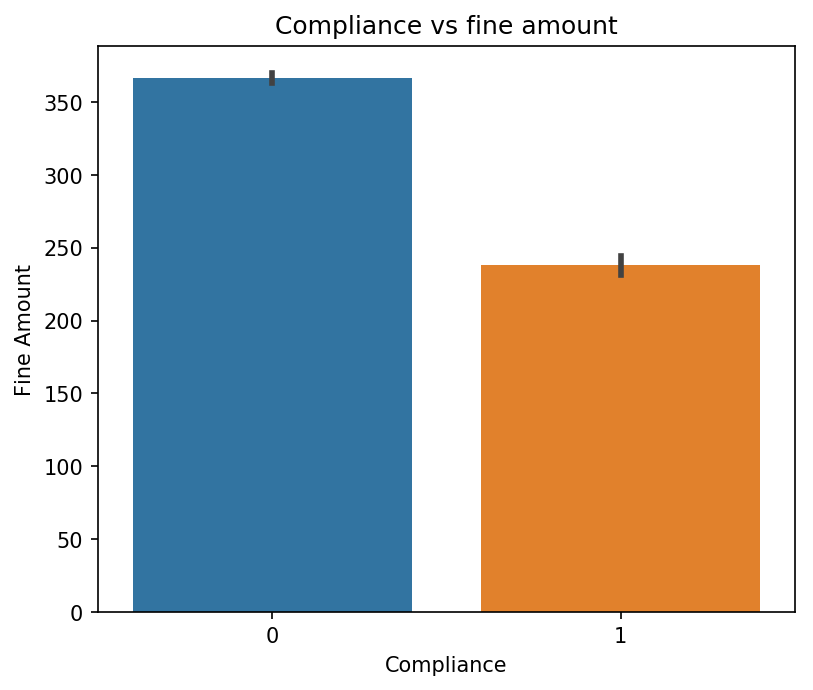

In [320]:
#Violation fine amount, excluding fees vs compliance
plt.figure(figsize=(6,5),dpi=150)
sns.barplot(x='compliance',y='fine_amount',data=train)
plt.xlabel('Compliance')
plt.ylabel('Fine Amount')
plt.title('Compliance vs fine amount')

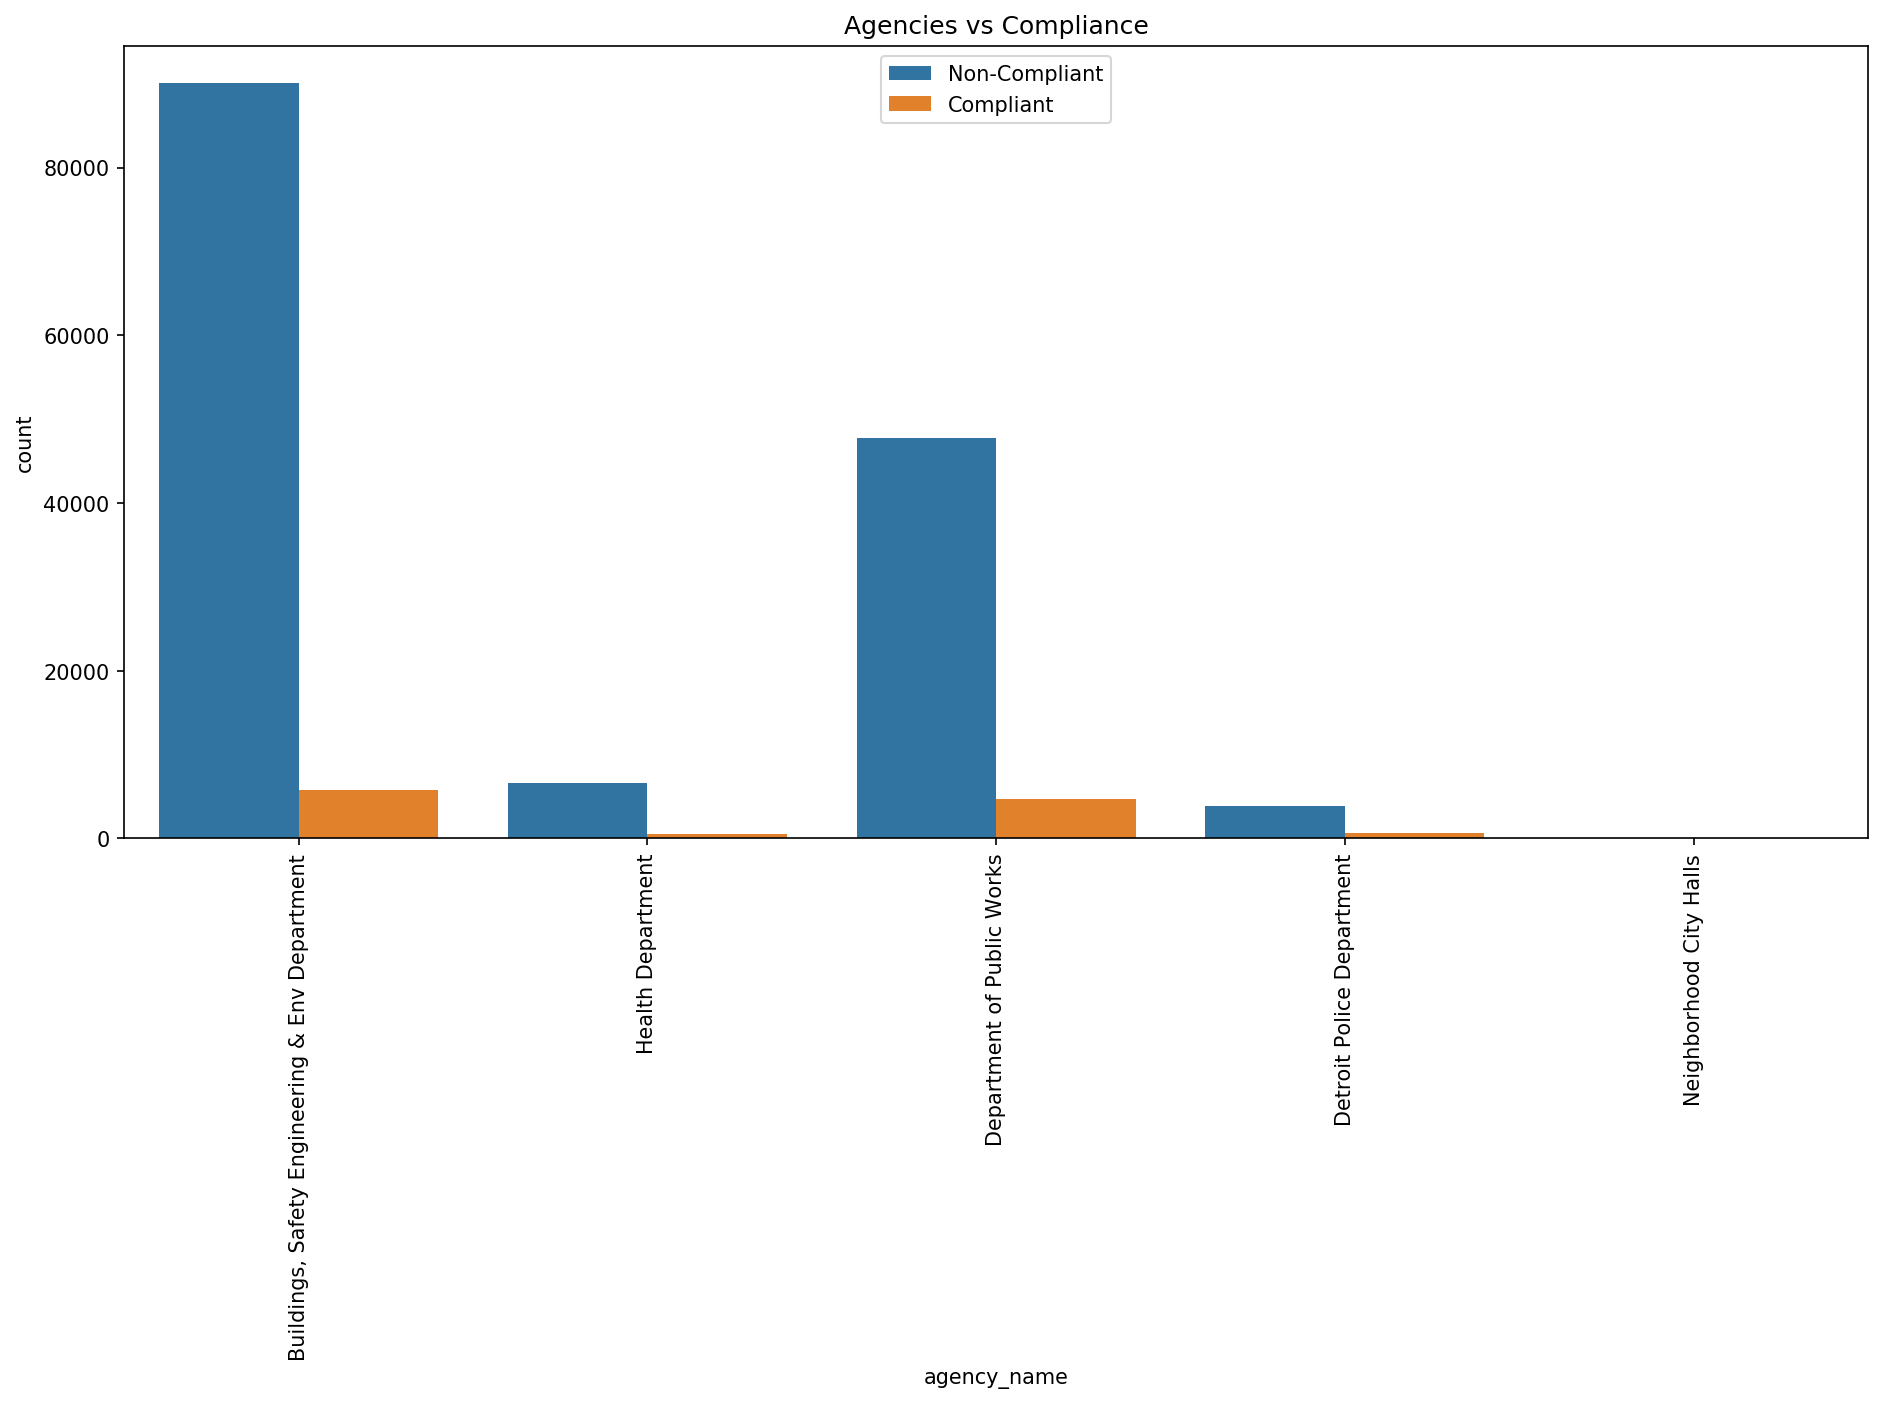

In [321]:
#Figure to view distribution of cases among angencies
plt.figure(figsize = (15,7), dpi = 150)
labels = ['Non-Compliant', 'Compliant']
ax = sns.countplot(train['agency_name'], hue = train['compliance'])
xlabel = train['agency_name'].unique()
ax.set_xticklabels(xlabel, rotation = 90)
ax.set_title('Agencies vs Compliance')
ax.legend(labels = labels)

In [275]:
train.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_status', 'compliance_detail', 'compliance', 'Duration'],
      dtype='object')

In [276]:
#train_number=train['zip_code'].value_counts()
#for x in col:
#    train['train_number']=train['zip_code'].map(lambda x: x,train_number)

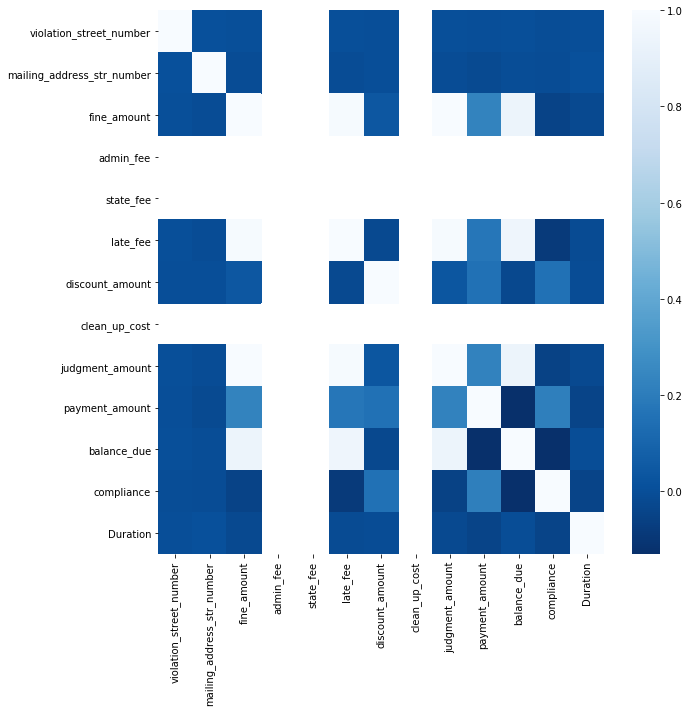

In [277]:
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(),cmap='Blues_r')

In [278]:
test['disposition'].value_counts()

Responsible by Default                51602
Responsible by Admission               4484
Responsible by Determination           4124
Responsible (Fine Waived) by Deter      781
Responsible - Compl/Adj by Default        6
Responsible - Compl/Adj by Determi        2
Responsible (Fine Waived) by Admis        1
Responsible by Dismissal                  1
Name: disposition, dtype: int64

## Feature engineering

In [322]:
streetVals = train.violation_street_number.value_counts()
zipCounts = train.zip_code.value_counts()
cityCounts = train.city.value_counts()
codeCounts = train.violation_code.value_counts()

In [323]:
train['violation_street_number'] = train['violation_street_number'].apply(lambda x: streetVals[x])   

In [324]:
train['zip_code'] = train['zip_code'].map(lambda x: zipCounts[x])   

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [nan] of <class 'float'>

In [325]:
train['city'] = train['city'].apply(lambda x: cityCounts[x])  


In [326]:
#train['violation_code'] = train.violation_code.apply(lambda x: 'others' if codeCounts[x] < 500 else x)

In [328]:
#train['violation_code'].value_counts()

9-1-36(a)               64414
9-1-81(a)               23145
22-2-88                 19073
9-1-104                 16927
others                   6386
22-2-88(b)               4879
22-2-45                  4200
9-1-105                  3619
9-1-110(a)               3147
9-1-43(a) - (Dwellin     3043
9-1-103(C)               2641
22-2-22                  2612
22-2-43                  2054
19450901                 1620
22-2-17                  1414
22-2-61                   706
Name: violation_code, dtype: int64

In [334]:
#Feature selection
train_set=train[['violation_street_number','city','agency_name','country', 'violation_description',  'disposition', 'fine_amount',
                 'admin_fee', 'late_fee','discount_amount','clean_up_cost',
       'judgment_amount','Duration','compliance']]

test_set=test[['violation_street_number','city','agency_name','country', 'violation_description',  'disposition', 'fine_amount',
       'admin_fee','late_fee', 'discount_amount','clean_up_cost',
       'judgment_amount','Duration']]

In [335]:
train_set.head()

,violation_street_number,city,agency_name,country,violation_description,disposition,fine_amount,admin_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,Duration,compliance
ticket_id,,,,,,,,,,,,,,
22056,76,564,"Buildings, Safety Engineering & Env Department",USA,Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,25.0,0.0,0.0,305.0,369,0
27586,10,6374,"Buildings, Safety Engineering & Env Department",USA,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,75.0,0.0,0.0,855.0,378,1
22046,3,1,"Buildings, Safety Engineering & Env Department",USA,Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,25.0,0.0,0.0,305.0,323,0
18738,11,5,"Buildings, Safety Engineering & Env Department",USA,Failed To Secure Permit For Lawful Use Of Land,Responsible by Default,750.0,20.0,75.0,0.0,0.0,855.0,253,0
18735,28,6374,"Buildings, Safety Engineering & Env Department",USA,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,20.0,10.0,0.0,0.0,140.0,251,0


In [207]:
#sns.pairplot(train_set,hue='compliance')

## Encoding

In [336]:
#Using one hot encoding
train_set=pd.get_dummies(train_set,columns=['agency_name','country', 'violation_description',  'disposition'])
test_set=pd.get_dummies(test_set,columns=['agency_name','country', 'violation_description',  'disposition'])

In [337]:
train_set.dtypes.value_counts()

uint8      221
float64      6
int64        3
int32        1
dtype: int64

In [338]:
train_set.columns

Index(['violation_street_number', 'city', 'fine_amount', 'admin_fee',
       'late_fee', 'discount_amount', 'clean_up_cost', 'judgment_amount',
       'Duration', 'compliance',
       ...
       'violation_description_Unlawful storage of items outside one- or two-family dwelling or commercial building',
       'violation_description_Unlawful use of Land',
       'violation_description_Use of kitchen or other non-habitable space(s) for sleeping purposes one- or two family dwelling or building',
       'violation_description_Using improper transport vehicle for solid, medical or hazardous waste; failure to obtain Police department certification',
       'violation_description_Violation of time limit for approved containers to remain at curbside - early or late',
       'violation_description_publicly-owned property, or private property or water, without a permit or dumping, storing or depositing solid waste less than 5 cubic feet from a moving vehicle on any publicly-owned property, or p

## Modelling

In [339]:
X=train_set.drop(['compliance'],axis=1)

In [340]:
X.dtypes=='object'

violation_street_number                                                                                                                                                                                                                                                    False
city                                                                                                                                                                                                                                                                       False
fine_amount                                                                                                                                                                                                                                                                False
admin_fee                                                                                                                                                                            

In [341]:
y=train_set['compliance']

In [342]:
X_train,X_valid,y_train,y_valid=train_test_split(X, y, test_size=0.33, random_state=42)

In [343]:
X_test=test_set

In [344]:
#Standardizing
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: could not convert string to float: 'DETROIT'

## Balancing the dataset

In [184]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 7, ratio = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [185]:
X_train.shape

(198698, 228)

In [186]:
X_valid.shape

(52761, 228)

### K nearest Neighbors

In [99]:
'''best_k=[]
for k in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predict_k=knn.predict(X_valid)
    acc=accuracy_score(y_valid, predict_k)
    best_k.append(acc)
    
plt.plot(range(1,40), best_k,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)'''

"best_k=[]\nfor k in range (1,40):\n    knn=KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train,y_train)\n    predict_k=knn.predict(X_valid)\n    acc=accuracy_score(y_valid, predict_k)\n    best_k.append(acc)\n    \nplt.plot(range(1,40), best_k,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)"

In [100]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_valid)

In [101]:
print(confusion_matrix(y_valid,knn_pred)),'\n'
print(classification_report(y_valid,knn_pred))

[[40880  8054]
 [ 1736  2091]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89     48934
           1       0.21      0.55      0.30      3827

   micro avg       0.81      0.81      0.81     52761
   macro avg       0.58      0.69      0.60     52761
weighted avg       0.90      0.81      0.85     52761



In [102]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,knn_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.6908959694851537


### Logistic Regression

In [103]:
lr=LogisticRegression()

In [104]:
lr.fit(X_train,y_train)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
lr_pred=lr.predict(X_valid)

In [106]:
print(confusion_matrix(y_valid,lr_pred)),'\n'
print(classification_report(y_valid,lr_pred))

[[42755  6179]
 [ 1508  2319]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     48934
           1       0.27      0.61      0.38      3827

   micro avg       0.85      0.85      0.85     52761
   macro avg       0.62      0.74      0.65     52761
weighted avg       0.92      0.85      0.88     52761



In [107]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,lr_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.7398427737796794


### Decision Tree

In [108]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=209, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [109]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=209, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
dt_pred=dt.predict(X_valid)

In [111]:
print(confusion_matrix(y_valid,dt_pred)),'\n'
print(classification_report(y_valid,dt_pred))

[[45720  3214]
 [ 2163  1664]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     48934
           1       0.34      0.43      0.38      3827

   micro avg       0.90      0.90      0.90     52761
   macro avg       0.65      0.68      0.66     52761
weighted avg       0.91      0.90      0.90     52761



In [112]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,dt_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.6845625132315345


## Random Forest

In [113]:
'''#Finding the best n-estimator
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()'''

"#Finding the best n-estimator\nn_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]\ntrain_results = []\ntest_results = []\nfor estimator in n_estimators:\n    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)\n    rf.fit(X_train, y_train)\n    train_pred = rf.predict(X_train)\n    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)\n    roc_auc = auc(false_positive_rate, true_positive_rate)\n    train_results.append(roc_auc)\n    y_pred = rf.predict(X_valid)\n    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, y_pred)\n    roc_auc = auc(false_positive_rate, true_positive_rate)\n    test_results.append(roc_auc)\nfrom matplotlib.legend_handler import HandlerLine2D\nline1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')\nline2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')\nplt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})\nplt.ylabel('AUC score')\nplt.xlabel('n_estimators')\npl

In [114]:
rf=RandomForestClassifier(n_estimators=75,max_depth=32)

In [115]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
rf_pred=rf.predict(X_valid)

In [117]:
print(confusion_matrix(y_valid,rf_pred)),'\n'
print(classification_report(y_valid,rf_pred))

[[45927  3007]
 [ 2082  1745]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     48934
           1       0.37      0.46      0.41      3827

   micro avg       0.90      0.90      0.90     52761
   macro avg       0.66      0.70      0.68     52761
weighted avg       0.91      0.90      0.91     52761



In [118]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,rf_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.6972603088865855


## Gradient Boost

In [119]:
gb=GradientBoostingClassifier()

In [120]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [121]:
gb_pred=gb.predict(X_valid)

In [122]:
print(confusion_matrix(y_valid,gb_pred)),'\n'
print(classification_report(y_valid,gb_pred))

[[44643  4291]
 [ 1680  2147]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     48934
           1       0.33      0.56      0.42      3827

   micro avg       0.89      0.89      0.89     52761
   macro avg       0.65      0.74      0.68     52761
weighted avg       0.92      0.89      0.90     52761



In [123]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,rf_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.6972603088865855


## Best Model is logistic regression with an AUC of 0.7398427737796794


In [133]:
X_valid.columns#head()#nunique()#.value_counts()

Index(['fine_amount', 'admin_fee', 'late_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'Duration',
       'agency_name_Buildings, Safety Engineering & Env Department',
       'agency_name_Department of Public Works',
       ...
       'violation_description_Unlawful storage of items outside one- or two-family dwelling or commercial building',
       'violation_description_Unlawful use of Land',
       'violation_description_Use of kitchen or other non-habitable space(s) for sleeping purposes one- or two family dwelling or building',
       'violation_description_Using improper transport vehicle for solid, medical or hazardous waste; failure to obtain Police department certification',
       'violation_description_Violation of time limit for approved containers to remain at curbside - early or late',
       'violation_description_publicly-owned property, or private property or water, without a permit or dumping, storing or depositing solid waste less th

## XGBOOST

In [216]:
from xgboost import XGBClassifier


In [217]:
xgb=XGBClassifier()

In [218]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [224]:
xgb_pred=xgb.predict(X_valid)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [223]:
X_valid.shape

(52761, 228)

In [156]:
X_valid.columns

Index(['fine_amount', 'admin_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'Duration',
       'agency_name_Buildings, Safety Engineering & Env Department',
       'agency_name_Department of Public Works',
       'agency_name_Detroit Police Department',
       ...
       'violation_description_Unlawful storage of items outside one- or two-family dwelling or commercial building',
       'violation_description_Unlawful use of Land',
       'violation_description_Use of kitchen or other non-habitable space(s) for sleeping purposes one- or two family dwelling or building',
       'violation_description_Using improper transport vehicle for solid, medical or hazardous waste; failure to obtain Police department certification',
       'violation_description_Violation of time limit for approved containers to remain at curbside - early or late',
       'violation_description_publicly-owned property, or private property or water, without a permit or dumping, stori

In [225]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_valid,xgb)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('\033[1m',roc_auc)

 0.6263443353877707


## Revision

In [11]:
import pandas as pd 
import numpy as np
pd.set_option('max_column',None)

In [12]:
#Load data set
train=pd.read_csv('D:\\resources\\Digital Academy\\Python\\Advanced\\Machine Learning\\train.csv',encoding='iso-8859-1',index_col=0)
test=pd.read_csv('D:\\resources\\Digital Academy\\Python\\Advanced\\Machine Learning\\test.csv',encoding='iso-8859-1',index_col=0)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
train.sample(5)

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27759,"Buildings, Safety Engineering & Env Department","Legge, Gerald","BUTLER, DWIGHT",16154.0,LAWTON,NaN,1136.0,PO. BOX,LINCOLN PARK,MI,48146,NaN,USA,2005-04-01 10:00:00,2005-05-05 15:00:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
160551,"Buildings, Safety Engineering & Env Department","Brackett, Ross","REPASKY, BLAISE",11523.0,LAKEPOINTE,NaN,9752.0,HAWTHORNE,GROSSE ISLE,MI,48138,NaN,USA,2008-02-21 10:00:00,2008-03-05 09:00:00,9-1-43(a) - (Dwellin,Failure of owner of one- or two-family dwellin...,Not responsible by City Dismissal,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
191949,"Buildings, Safety Engineering & Env Department","Russ, Kenneth","CLARK, JUAN",5173.0,ROHNS,NaN,5775.0,DETROIT,DEARBORN,MI,48125,NaN,USA,2008-09-19 12:30:00,2008-10-22 09:00:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
174500,"Buildings, Safety Engineering & Env Department","Harris, Rickey","OF GOD, PENTECOSTAL CHURCH",9207.0,DELMAR,NaN,9244.0,DELMAR,DETROIT,MI,48211,NaN,USA,2008-05-21 09:00:00,2008-10-06 15:00:00,9-1-81(a),Failure to obtain certificate of registration ...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,305.0,0.0,2008-10-10 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
23404,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","Slater, Henry",14944.0,FORRER,NaN,17576.0,Parkside,Detroit,MI,48221,NaN,USA,2005-02-23 11:30:00,2005-06-03 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Determination,250.0,20.0,10.0,25.0,0.0,0.0,305.0,280.0,25.0,2005-06-20 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [14]:
test.sample(5)

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
ticket_id,,,,,,,,,,,,,,,,,,,,,,,,,,
335012,"Buildings, Safety Engineering & Env Department","Wright, Donnie",SHAH & WATTS,9465.0,GRAND RIVER,NaN,1559,SYLVANIA AVE.,TOLEDO,OH,43612,NaN,USA,2015-04-24 10:15:00,2015-06-01 10:30:00,9-1-113,Failure to maintain a vacant building or struc...,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NaN
294903,Department of Public Works,"May, Tanya","WELL FARGO BANK,NA, .",19191.0,TRINITY,NaN,3476,STATE VIEW BLVD,FORT MILL,SC,29715,NaN,USA,2012-08-30 10:05:00,2012-10-03 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
341116,Department of Public Works,"Granberry, Aisha B","TURNER, ROGER L",11511.0,ROSA PARKS BLVD,48206,3615,VERNOR DR,BEVERLY HILLS,MI,48025,NaN,USA,2015-08-04 15:20:00,2015-08-20 09:00:00,22-2-61,Failure to secure City or Private solid waste ...,Responsible by Determination,200.0,20.0,10.0,0.0,0.0,0.0,230.0,NaN
302265,Department of Public Works,"Granberry, Aisha B","ANDERSON, TIA M",18225.0,CONCORD,NaN,4836,AVERY,DETROIT,MI,48208,NaN,USA,2013-03-06 11:35:00,2013-04-11 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
361208,Department of Public Works,"Lusk, Gertrina","RENTAL LLC, PEARL 8M HOMES",20053.0,GRIGGS,NaN,2514,LAHSER,SOUTHFIELD,MI,48033,NaN,USA,2016-05-04 10:45:00,2016-06-15 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,500.0,20.0,10.0,50.0,0.0,0.0,580.0,NaN


## Explore the data

In [21]:
print('We have {} columns'.format(train.shape[1]))
print('We have {} columns'.format(test.shape[1]))

We have 33 columns
We have 26 columns


In [22]:
import pandas_profiling as pp
pp.ProfileReport(train).to_file('Train.html')

In [35]:
#clean data
df=train[test.columns]
df['compliance']=train['compliance']

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
train[train.columns[~train.columns.isin(test.columns)]].columns

Index(['payment_amount', 'balance_due', 'payment_date', 'payment_status',
       'collection_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250306 entries, 22056 to 325561
Data columns (total 27 columns):
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null object
violation_description         250306 non-nul

In [38]:
(df.isna().sum()/df.shape[0])*100

agency_name                     0.000000
inspector_name                  0.000000
violator_name                   0.013583
violation_street_number         0.000000
violation_street_name           0.000000
violation_zip_code            100.000000
mailing_address_str_number      1.439039
mailing_address_str_name        0.001598
city                            0.000000
state                           0.037155
zip_code                        0.000400
non_us_str_code                99.998801
country                         0.000000
ticket_issued_date              0.000000
hearing_date                    4.990292
violation_code                  0.000000
violation_description           0.000000
disposition                     0.000000
fine_amount                     0.000400
admin_fee                       0.000000
state_fee                       0.000000
late_fee                        0.000000
discount_amount                 0.000000
clean_up_cost                   0.000000
judgment_amount 

In [50]:
#a=df.drop((i for i in ((df.isna().sum()/df.shape[0])*100) if i >= 80),axis=1)

In [55]:
#Function to drop nulls
df.drop(df.columns[df.isnull().mean() > 0.8],axis=1,inplace=True)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250306 entries, 22056 to 325561
Data columns (total 24 columns):
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null object
violation_description         250306 non-null object
disposition                   250306 non-null object
fine_amount                   25030

In [54]:
#Method 2 to drop nulls
b = df.dropna(thresh = len(df)*0.2, axis = 1)
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250306 entries, 22056 to 325561
Data columns (total 24 columns):
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null object
violation_description         250306 non-null object
disposition                   250306 non-null object
fine_amount                   25030

In [56]:
df.isna().sum()

agency_name                       0
inspector_name                    0
violator_name                    34
violation_street_number           0
violation_street_name             0
mailing_address_str_number     3602
mailing_address_str_name          4
city                              0
state                            93
zip_code                          1
country                           0
ticket_issued_date                0
hearing_date                  12491
violation_code                    0
violation_description             0
disposition                       0
fine_amount                       1
admin_fee                         0
state_fee                         0
late_fee                          0
discount_amount                   0
clean_up_cost                     0
judgment_amount                   0
compliance                    90426
dtype: int64

In [57]:
df['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

In [61]:
df=df[np.isfinite(df['compliance'])]
#df['compliance'].dropna(axis=1)
#df.dropna(subset=['compliance'],axis=0,inplace=True)

In [64]:
df['city']=df['city'].str.upper()

In [69]:
df[df['city'].str.contains('DET')]

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,,,,
27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,DETROIT,MI,48208,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0
18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,8228.0,Mt. Elliott,DETROIT,MI,48211,USA,2004-06-16 12:30:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0
18733,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,8228.0,Mt. Elliott,DETROIT,MI,48211,USA,2004-06-16 12:25:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0
28204,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Inc, Nanno",15307.0,SEVEN MILE,1537.0,E. Seven Mile,DETROIT,MI,48205,USA,2004-07-12 13:30:00,2005-05-31 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
18743,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Gardner Resale, GAR",9100.0,VAN DYKE,91.0,Van Dyke,DETROIT,MI,48213,USA,2004-07-28 12:15:00,2005-02-22 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
18741,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Hardaway, Kevin",20024.0,SCHAEFER,224.0,Schaefer,DETROIT,MI,48235,USA,2004-08-05 15:00:00,2005-02-22 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
18978,"Buildings, Safety Engineering & Env Department","Williams, Darrin","TLC Hand Car Wash, a/k/a",9425.0,VAN DYKE,9425.0,Van Dyke,DETROIT,MI,48213,USA,2004-08-23 14:15:00,2005-02-28 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
18746,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Klenk, Dean",14715.0,KLENK,14715.0,Klenk,DETROIT,MI,48215,USA,2004-10-07 12:00:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Determination,100.0,20.0,10.0,10.0,0.0,0.0,140.0,1.0
18744,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Kuhn, Dean",14715.0,KLENK,141715.0,Klenk,DETROIT,MI,48215,USA,2004-10-07 12:00:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Determination,100.0,20.0,10.0,10.0,0.0,0.0,140.0,1.0


In [70]:
df[['city','zip_code']]

,city,zip_code
ticket_id,,
22056,CHICAGO,60606
27586,DETROIT,48208
22046,LOG BEACH,908041512
18738,CLINTON,48038
18735,DETROIT,48211
18733,DETROIT,48211
28204,DETROIT,48205
18743,DETROIT,48213
18741,DETROIT,48235
